In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")
df1.head(253680)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df1.shape

(253680, 22)

In [5]:
num_rows = len(df1)
print(num_rows)

253680


In [6]:
len(df1.index)

253680

In [7]:
df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# problem of null values in df solved by chaneg column('Diabetes_012 ') name
df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [9]:
df1.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
#read table 2
df2 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2.head(253680)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [11]:
df2.shape

(70692, 22)

In [12]:
df2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
#read table 3
df3 = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df3.head(253680)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [14]:
df3.shape

(253680, 22)

In [15]:
df3.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [16]:
# merge 3 tables in 1 dataframe
df=pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
df.shape # prolem no.of column increase

(578052, 22)

In [18]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# sanity check of data# 

In [19]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [20]:
for i in df.select_dtypes(include='float64').columns:
    print(df[i].value_counts())
    print('*'*20)

Diabetes_binary
0.0    467383
1.0     75323
2.0     35346
Name: count, dtype: int64
********************
HighBP
0.0    320562
1.0    257490
Name: count, dtype: int64
********************
HighChol
0.0    325707
1.0    252345
Name: count, dtype: int64
********************
CholCheck
1.0    557363
0.0     20689
Name: count, dtype: int64
********************
BMI
27.0    55539
26.0    46099
24.0    43492
25.0    38323
28.0    37673
        ...  
78.0        3
85.0        3
91.0        2
90.0        2
96.0        2
Name: count, Length: 84, dtype: int64
********************
Smoker
0.0    319608
1.0    258444
Name: count, dtype: int64
********************
Stroke
0.0    553073
1.0     24979
Name: count, dtype: int64
********************
HeartDiseaseorAttack
0.0    519817
1.0     58235
Name: count, dtype: int64
********************
PhysActivity
1.0    433539
0.0    144513
Name: count, dtype: int64
********************
Fruits
1.0    365045
0.0    213007
Name: count, dtype: int64
******************

# have no null values# 

In [21]:
# df.info()
# # as i see all columns are number there is no to encoding

In [22]:
#finding duplicates
df.duplicated().sum()

308921

In [23]:
# emove duplicates
# Remove duplicate rows based on all columns
df=df.drop_duplicates()
df.shape

(269131, 22)

In [24]:
for i in df.select_dtypes(include='float64').columns:
    print(df[i].value_counts())
    print('*'*20)

Diabetes_binary
0.0    194377
1.0     39657
2.0     35097
Name: count, dtype: int64
********************
HighBP
0.0    135600
1.0    133531
Name: count, dtype: int64
********************
HighChol
0.0    141461
1.0    127670
Name: count, dtype: int64
********************
CholCheck
1.0    259530
0.0      9601
Name: count, dtype: int64
********************
BMI
27.0    24646
26.0    20036
24.0    18174
28.0    17420
25.0    16463
        ...  
85.0        2
78.0        2
91.0        1
86.0        1
90.0        1
Name: count, Length: 84, dtype: int64
********************
Smoker
0.0    141764
1.0    127367
Name: count, dtype: int64
********************
Stroke
0.0    255315
1.0     13816
Name: count, dtype: int64
********************
HeartDiseaseorAttack
0.0    236905
1.0     32226
Name: count, dtype: int64
********************
PhysActivity
1.0    193346
0.0     75785
Name: count, dtype: int64
********************
Fruits
1.0    163831
0.0    105300
Name: count, dtype: int64
******************

In [25]:
#identifiying arbaeg values
#all dtype fo  columns are  float64 then no garbae value

# step4: exploratory data analysis(EDA)
# 

In [26]:
#descripe statistics
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,...,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000,269131.000000
mean,0.408169,0.496156,0.474379,0.964326,29.149920,0.473253,0.051336,0.119741,0.718409,0.608741,...,0.947739,0.095359,2.698816,3.656606,5.144911,0.211878,0.443966,8.270047,4.944926,5.788675
std,0.708792,0.499986,0.499344,0.185477,6.963748,0.499285,0.220682,0.324659,0.449776,0.488033,...,0.222553,0.293710,1.083537,7.922282,9.468522,0.408640,0.496851,3.032032,1.006961,2.125078
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

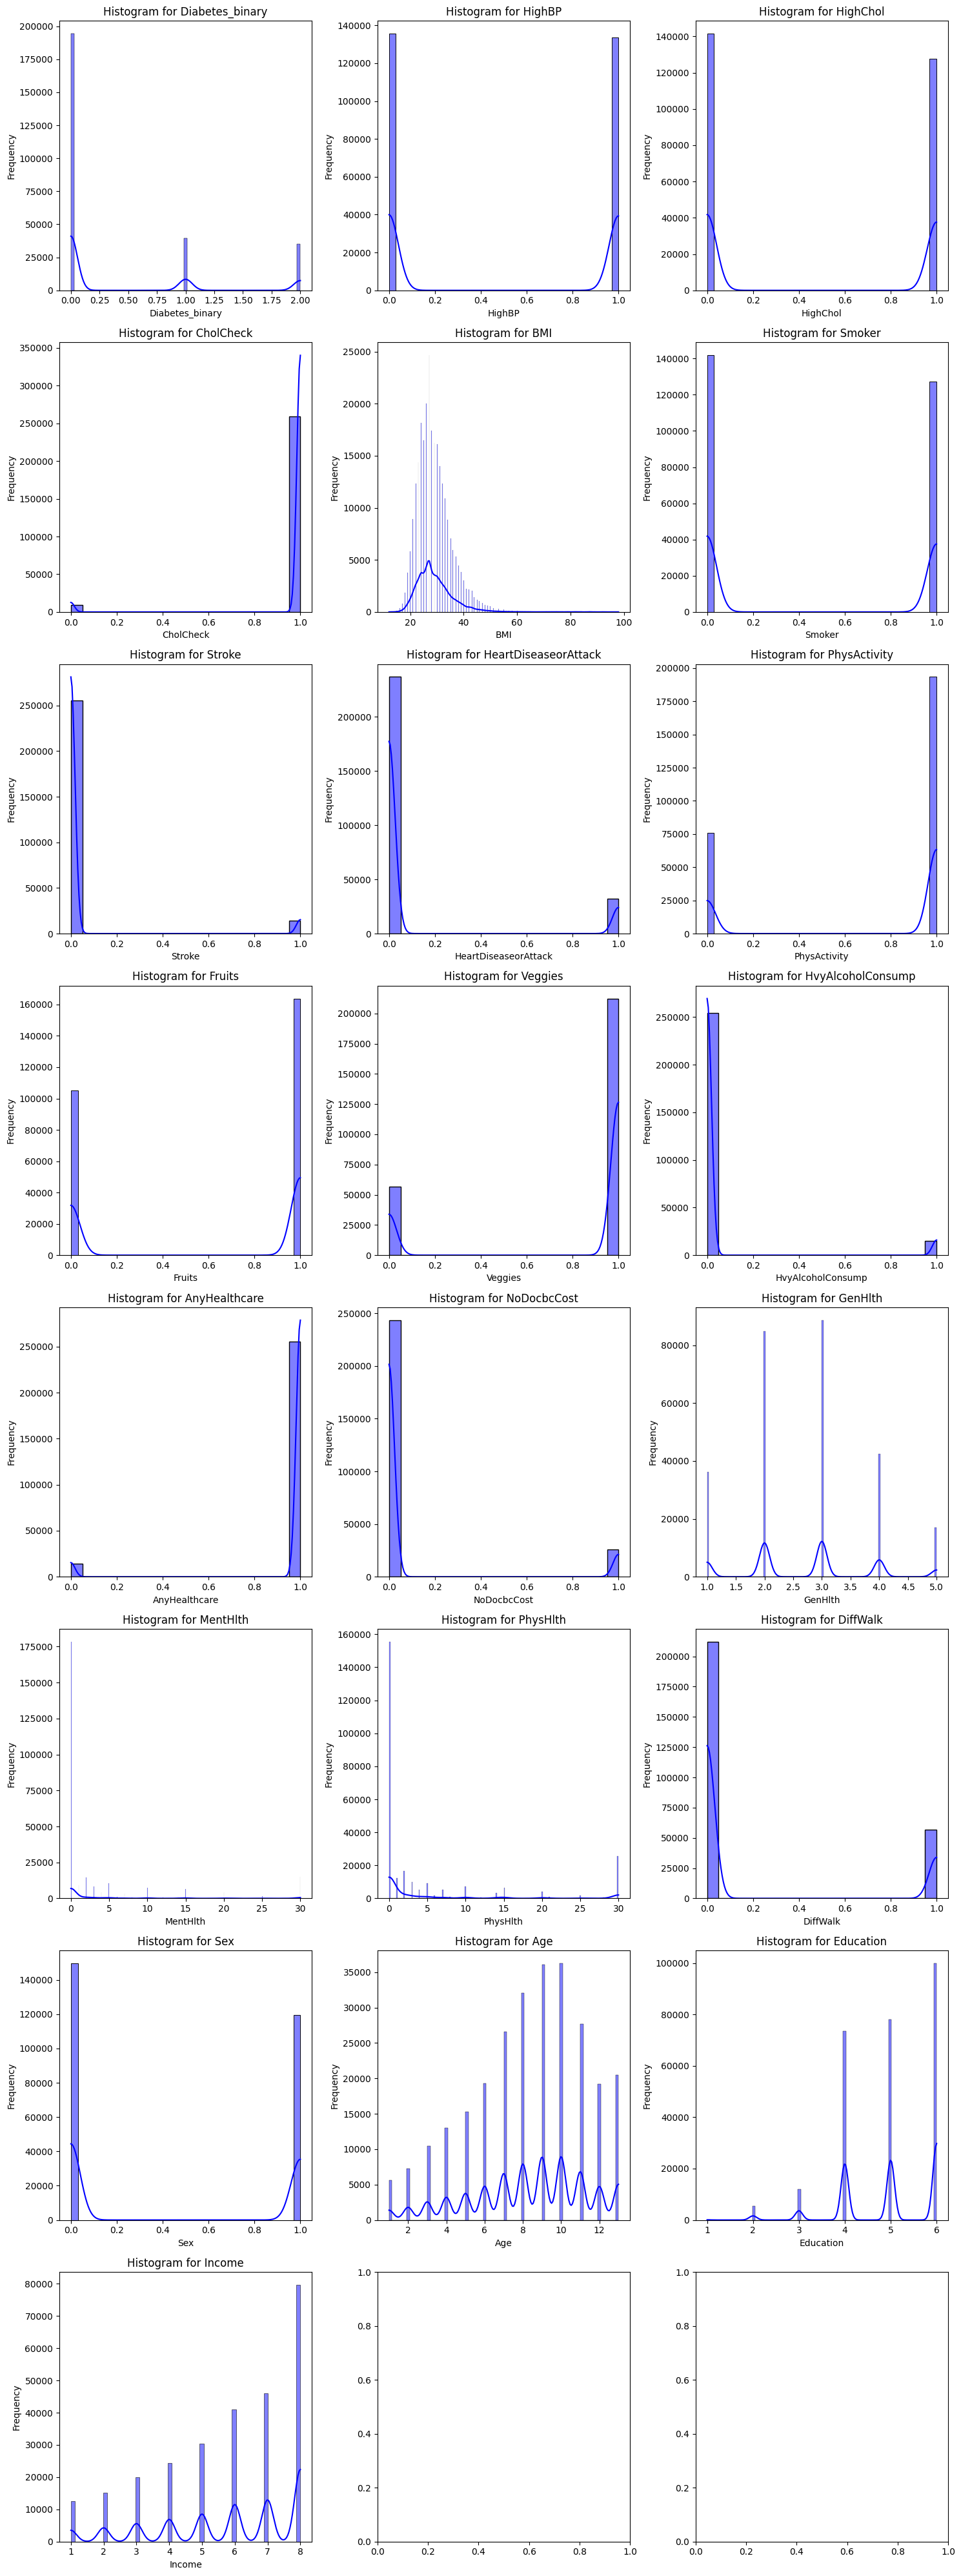

In [27]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the subplots grid (you can adjust as needed)
num_columns = 3  # Number of columns in the grid layout
num_rows = (len(numerical_columns) // num_columns) + (1 if len(numerical_columns) % num_columns > 0 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing if the number of rows > 1
axes = axes.flatten()

# Loop through each numerical column and plot a histogram on the corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.show()

In [28]:
df.shape

(269131, 22)

In [29]:
# no mean for Diabetsbinary =2
# df=df[df['Diabetes_binary'] > 1]

In [30]:
df.shape

(269131, 22)

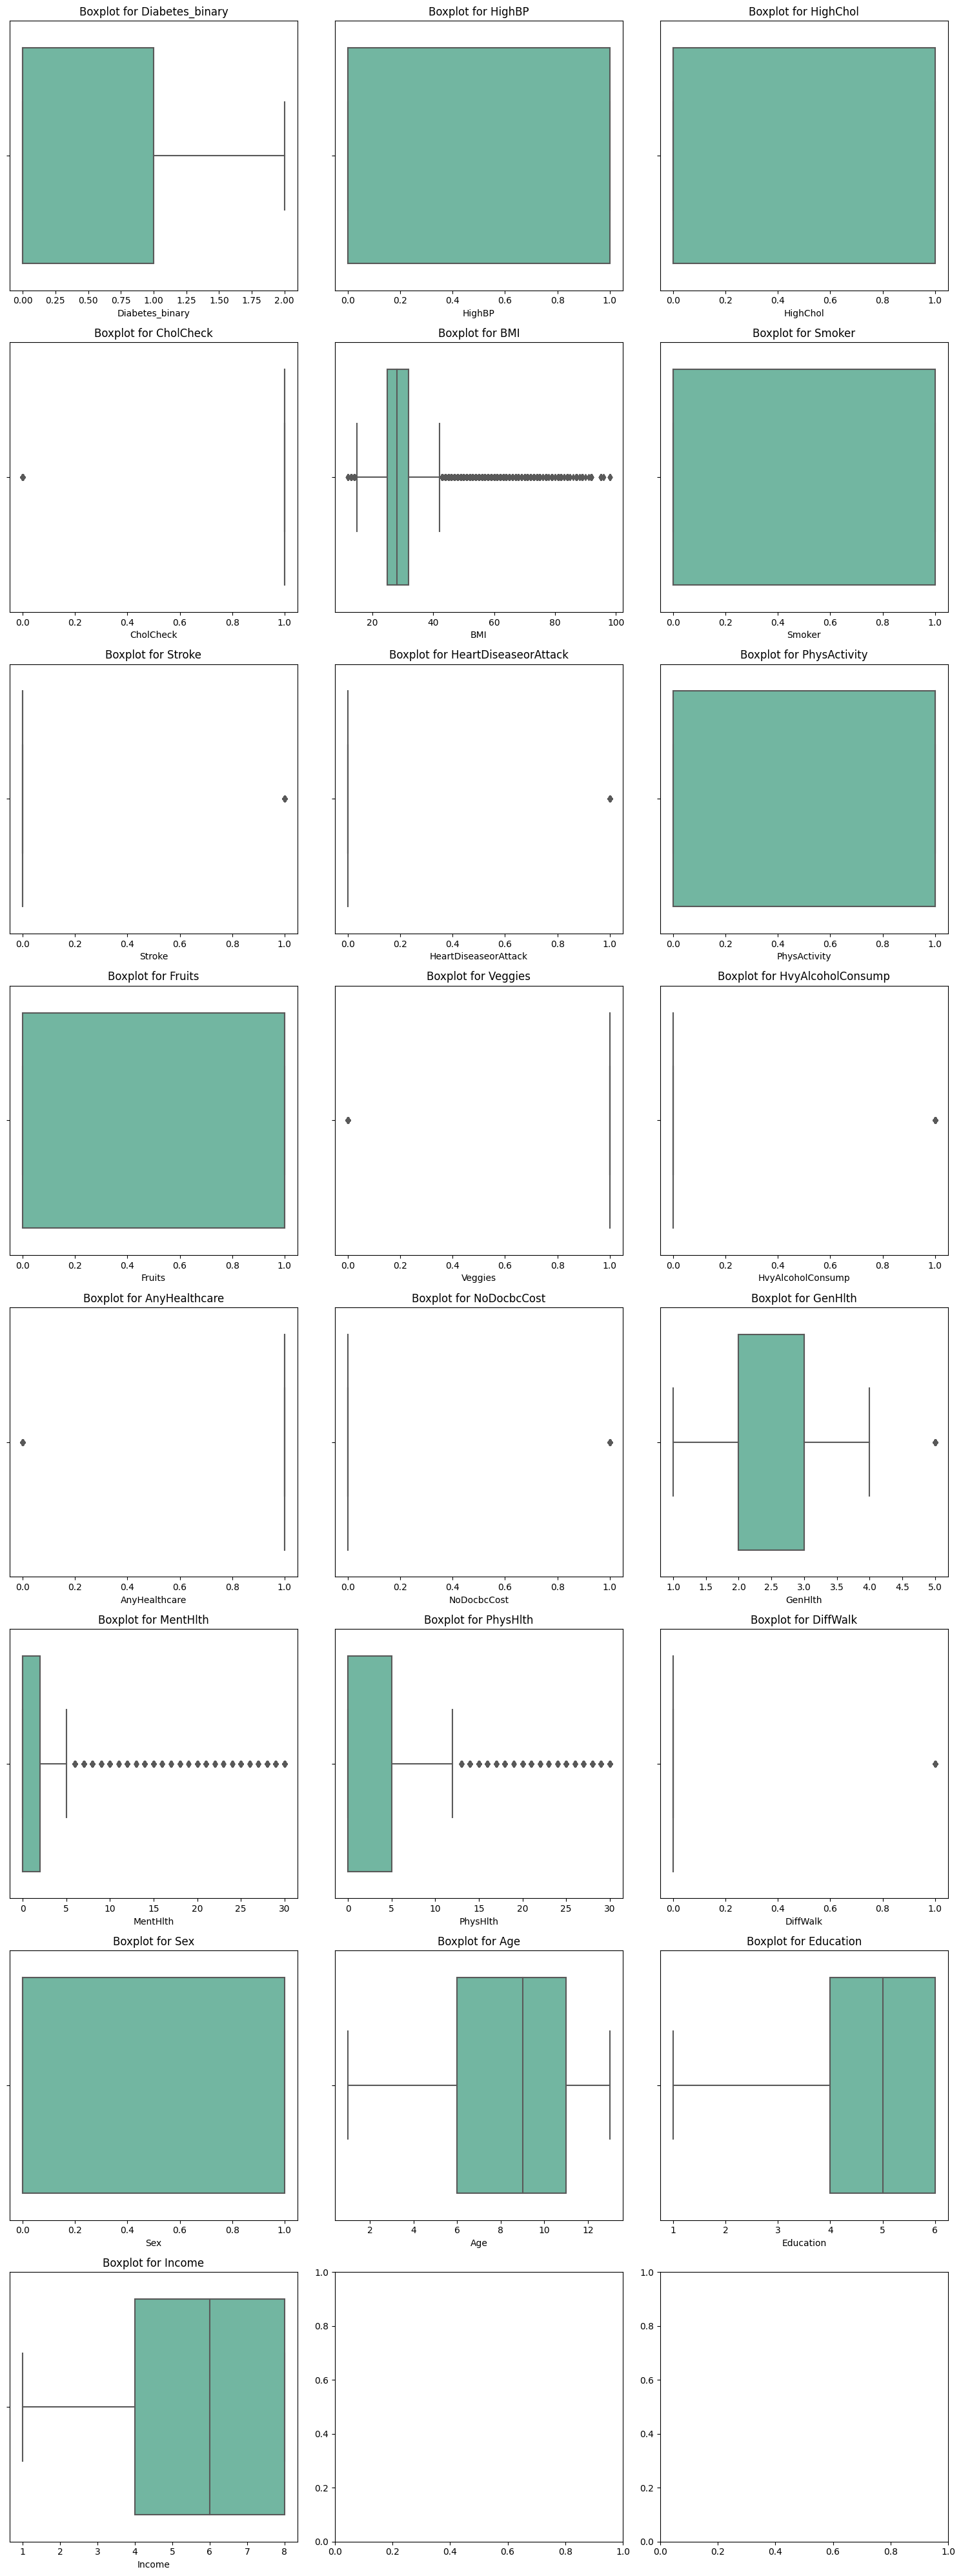

In [31]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the subplots grid (you can adjust as needed)
num_columns = 3  # Number of columns in the grid layout
num_rows = (len(numerical_columns) // num_columns) + (1 if len(numerical_columns) % num_columns > 0 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing if the number of rows > 1
axes = axes.flatten()

# Loop through each numerical column and plot a boxplot on the corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.show()

# outliers treatment# 

In [32]:

def wisker(col):
    q1,q3=np.percentile(col,[25,75]) # caluclate first the 25 percentile and 75%
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [33]:
#try function
wisker(df['PhysHlth'])

(-7.5, 12.5)

In [34]:
for i in df.select_dtypes(include='float64').columns:
    print(df[i].value_counts())
    print('*'*20)

Diabetes_binary
0.0    194377
1.0     39657
2.0     35097
Name: count, dtype: int64
********************
HighBP
0.0    135600
1.0    133531
Name: count, dtype: int64
********************
HighChol
0.0    141461
1.0    127670
Name: count, dtype: int64
********************
CholCheck
1.0    259530
0.0      9601
Name: count, dtype: int64
********************
BMI
27.0    24646
26.0    20036
24.0    18174
28.0    17420
25.0    16463
        ...  
85.0        2
78.0        2
91.0        1
86.0        1
90.0        1
Name: count, Length: 84, dtype: int64
********************
Smoker
0.0    141764
1.0    127367
Name: count, dtype: int64
********************
Stroke
0.0    255315
1.0     13816
Name: count, dtype: int64
********************
HeartDiseaseorAttack
0.0    236905
1.0     32226
Name: count, dtype: int64
********************
PhysActivity
1.0    193346
0.0     75785
Name: count, dtype: int64
********************
Fruits
1.0    163831
0.0    105300
Name: count, dtype: int64
******************

In [35]:
# treatment for outliers from all columns but not that in column 'BMI'
for i in ['BMI','MentHlth', 'PhysHlth',]:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [36]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [37]:
df.columns


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [38]:
df.shape

(269131, 22)

In [39]:
# #scatter plot to understand the relations
# for i in ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
#        'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
#        'Income']:
#     sns.scatterplot(data=df,x=i,y='Diabetes_binary')
#     plt.show()

In [40]:
# corelation with heatmap to interpret the relation muulticolliniarity
s=df.select_dtypes(include='number').corr()
s

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.289148,0.222627,0.088574,0.250329,0.051833,0.105204,0.178769,-0.112682,-0.028173,...,0.028758,0.024091,0.310458,0.030424,0.172009,0.222588,0.036505,0.207607,-0.116558,-0.159230
HighBP,0.289148,1.000000,0.295372,0.115258,0.233064,0.073545,0.126590,0.205232,-0.111955,-0.021939,...,0.051405,0.006620,0.288017,0.010540,0.158288,0.222083,0.044674,0.341013,-0.118954,-0.151856
HighChol,0.222627,0.295372,1.000000,0.096787,0.118346,0.077958,0.092659,0.179042,-0.070862,-0.029685,...,0.048987,0.009945,0.205159,0.041452,0.128085,0.147870,0.020396,0.257788,-0.058798,-0.075512
CholCheck,0.088574,0.115258,0.096787,1.000000,0.053713,-0.002098,0.028130,0.050452,-0.008042,0.016441,...,0.113441,-0.052142,0.069098,-0.002817,0.045518,0.052369,-0.021147,0.100189,-0.013444,-0.002686
BMI,0.250329,0.233064,0.118346,0.053713,1.000000,-0.002871,0.017278,0.055027,-0.144083,-0.073916,...,-0.003469,0.050210,0.240408,0.064031,0.128824,0.208005,0.031869,-0.035312,-0.086835,-0.082543
Smoker,0.051833,0.073545,0.077958,-0.002098,-0.002871,1.000000,0.055425,0.109935,-0.065564,-0.061811,...,-0.011961,0.033432,0.133566,0.049123,0.095607,0.108754,0.103491,0.103534,-0.130225,-0.092677
Stroke,0.105204,0.126590,0.092659,0.028130,0.017278,0.055425,1.000000,0.208361,-0.063809,-0.005429,...,0.012788,0.030929,0.176450,0.049625,0.143572,0.176708,0.003971,0.127045,-0.066216,-0.122605
HeartDiseaseorAttack,0.178769,0.205232,0.179042,0.050452,0.055027,0.109935,0.208361,1.000000,-0.079860,-0.008824,...,0.026492,0.024314,0.257999,0.033487,0.178385,0.215208,0.093976,0.225103,-0.085825,-0.130277
PhysActivity,-0.112682,-0.111955,-0.070862,-0.008042,-0.144083,-0.065564,-0.063809,-0.079860,1.000000,0.123764,...,0.022547,-0.048132,-0.245343,-0.073324,-0.197555,-0.246473,0.038790,-0.091756,0.170967,0.170293
Fruits,-0.028173,-0.021939,-0.029685,0.016441,-0.073916,-0.061811,-0.005429,-0.008824,0.123764,1.000000,...,0.023090,-0.033536,-0.072674,-0.046423,-0.026453,-0.033056,-0.088239,0.072064,0.084136,0.053510


<Axes: >

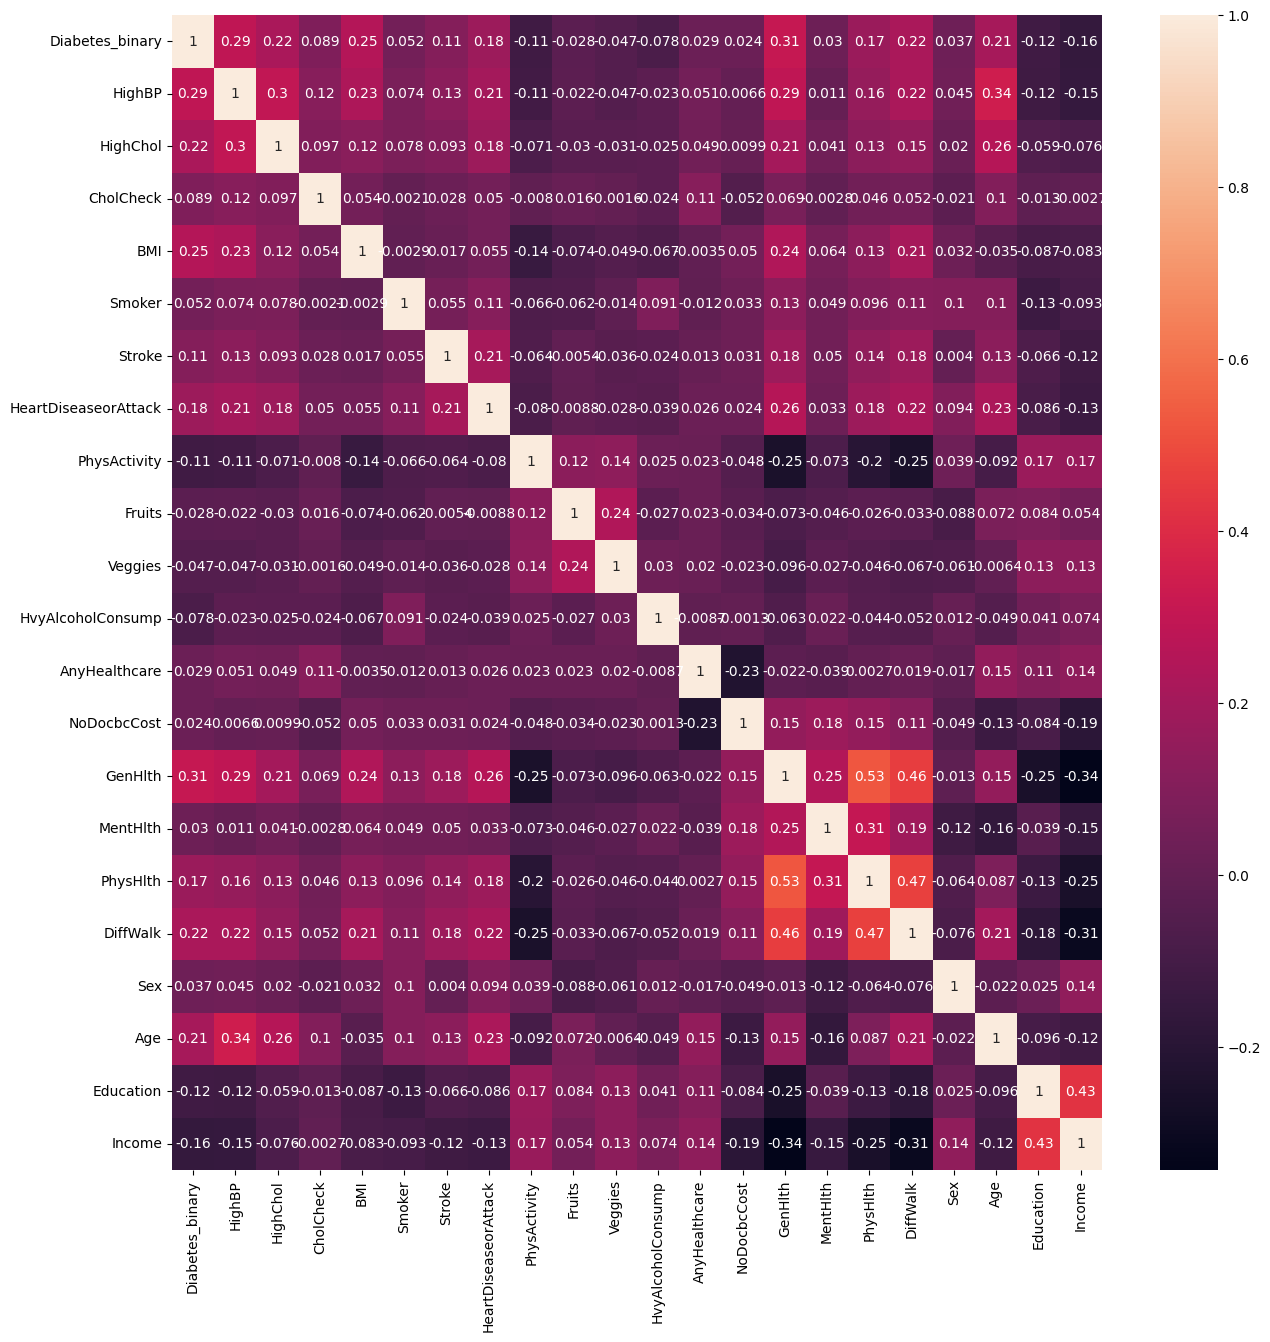

In [41]:
# corelation with heatmap to interpret the relation muulticolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(s, annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


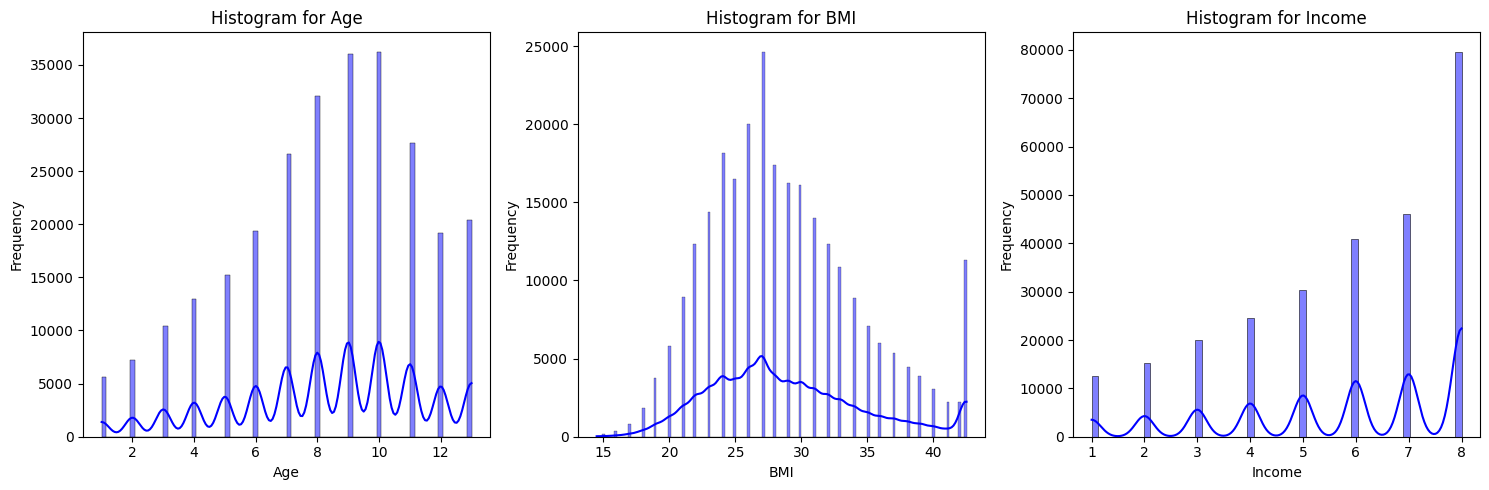

In [42]:
# List of specific columns you want to plot histograms for
specific_columns = ['Age', 'BMI', 'Income']  # Change this list to your preferred columns

# Define the number of rows and columns for the subplots grid
num_columns = 3  # Number of columns in the grid layout (you can adjust this as needed)
num_rows = (len(specific_columns) // num_columns) + (1 if len(specific_columns) % num_columns > 0 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing if the number of rows > 1
axes = axes.flatten()

# Loop through each specific column and plot a histogram on the corresponding subplot
for i, col in enumerate(specific_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.show()


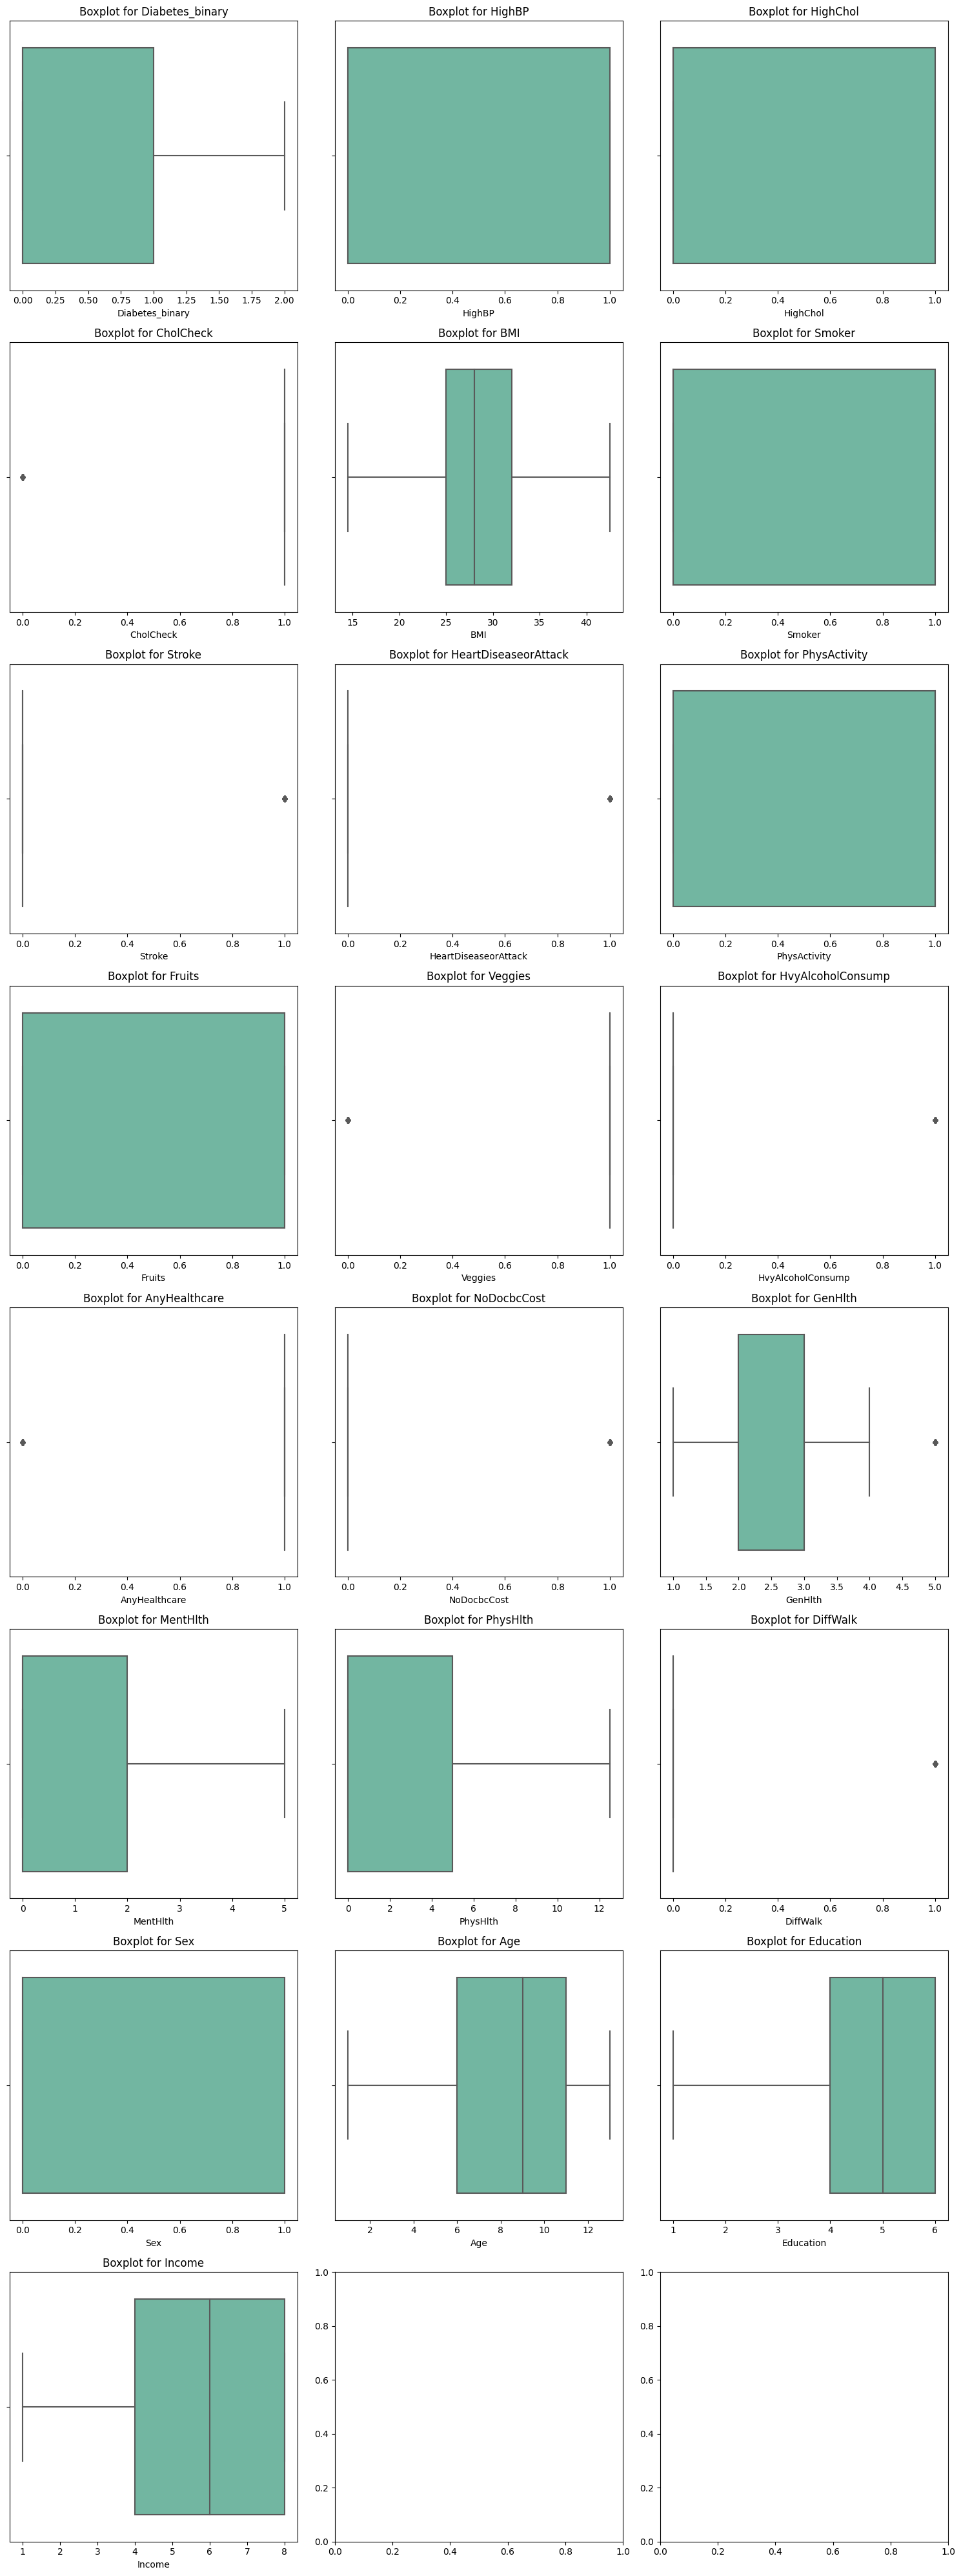

In [43]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the subplots grid (you can adjust as needed)
num_columns = 3  # Number of columns in the grid layout
num_rows = (len(numerical_columns) // num_columns) + (1 if len(numerical_columns) % num_columns > 0 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing if the number of rows > 1
axes = axes.flatten()

# Loop through each numerical column and plot a boxplot on the corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.show()

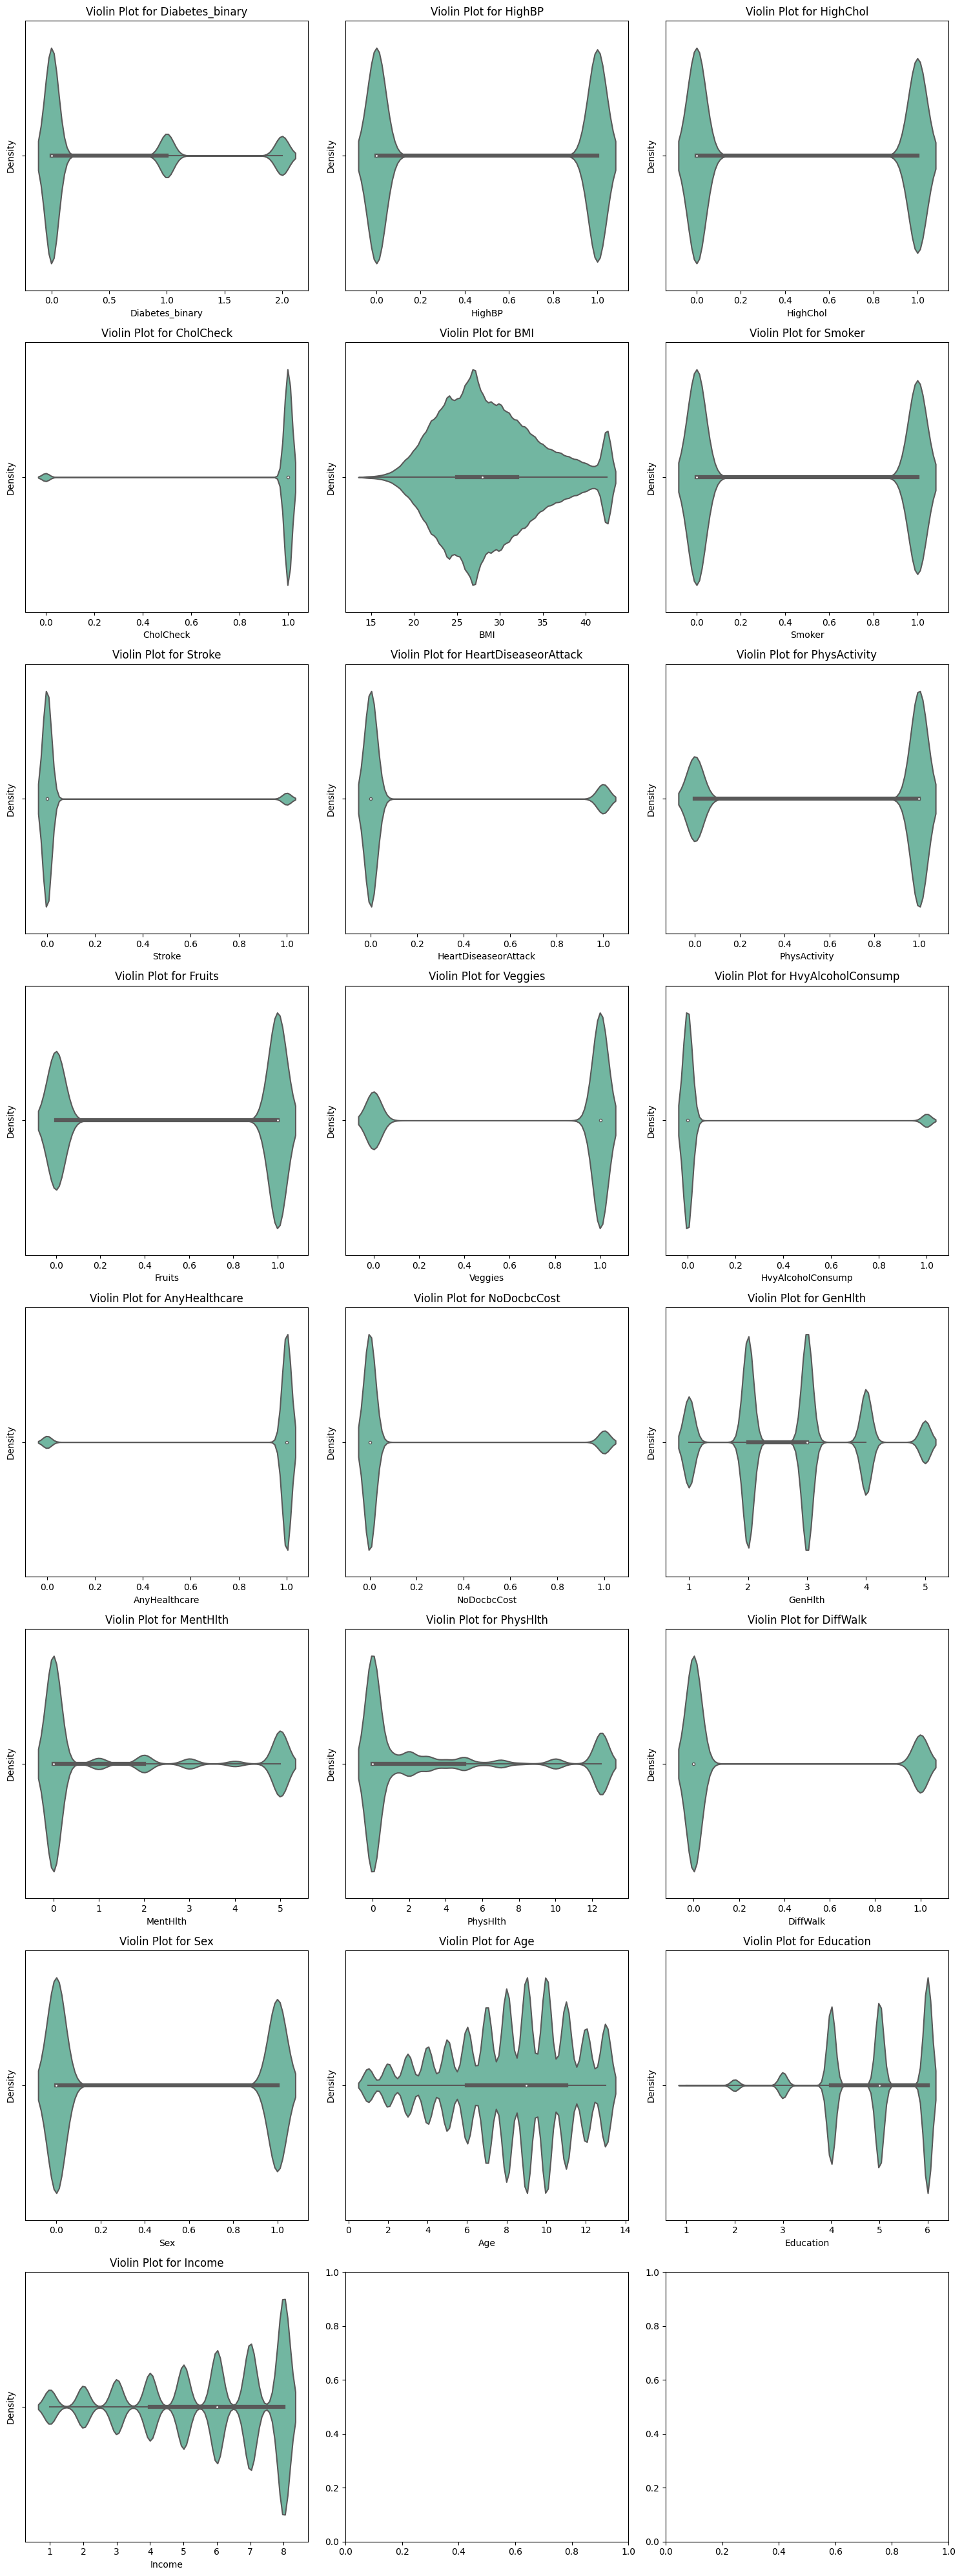

In [44]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the subplots grid (you can adjust as needed)
num_columns = 3  # Number of columns in the grid layout (you can adjust this as needed)
num_rows = (len(numerical_columns) // num_columns) + (1 if len(numerical_columns) % num_columns > 0 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing if the number of rows > 1
axes = axes.flatten()

# Loop through each numerical column and plot a violin plot on the corresponding subplot
for i, col in enumerate(numerical_columns):
    sns.violinplot(x=df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Violin Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()
plt.show()

In [45]:
ls=df.columns

In [46]:
(df['Age']<=0).sum()

0

In [47]:
for i in ls:
    sum=(df[i]<0).sum()
    print(f'{i}: {sum}')

Diabetes_binary: 0
HighBP: 0
HighChol: 0
CholCheck: 0
BMI: 0
Smoker: 0
Stroke: 0
HeartDiseaseorAttack: 0
PhysActivity: 0
Fruits: 0
Veggies: 0
HvyAlcoholConsump: 0
AnyHealthcare: 0
NoDocbcCost: 0
GenHlth: 0
MentHlth: 0
PhysHlth: 0
DiffWalk: 0
Sex: 0
Age: 0
Education: 0
Income: 0


In [48]:
df.reset_index()

,index,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,5.0,12.5,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,5.0,12.5,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269126,577880,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,10.0,0.0,0.0,11.0,3.0,1.0
269127,577900,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,0.0,4.0,5.0,4.0
269128,577901,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,9.0,6.0,7.0
269129,578036,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0


In [49]:
df.to_csv("cleaned_Diabetes.csv")